## Homework 2 - Numerical

In [100]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
%matplotlib inline

In [103]:
time_index = np.arange(0.01, 1.01, 0.01)

In [104]:
time_index.shape

(100,)

#### (a) The command numpy.linalg.cholesky in Python gives the Cholesky decomposition of a covariance matrix $\zeta$. Use this to plot 100 paths of the following processes on [0, 1] using a discretization of 0.01.
1. Brownian motion: $\zeta(s,t) = s ∧ t$ with mean 0
2. Brownian bridge: $\zeta(s, t) = s(1 − t)$ for $s ≤ t$ with mean 0.
3. Ornstein-Uhlenbeck process: $\zeta(s, t) = \frac{1}{2}e^{-2(t−s)}(1-e^{-2s})$ with mean 0 (so that $Y_0 = 0$).
4. Ornstein-Uhlenbeck process: $\zeta(s, t) = \frac{1}{2}e^{-2(t−s)}$ with mean 0 (so that $Y_0$ is Gaussian random variable of mean 0 and variance 1/2).

In [145]:
def brownian_c(s: float, t: float):
    if s < t:
        return s
    else:
        return t

In [149]:
def ornstein_uhlenbeck(s: float, t:float, type:int = None):
    if type == 1:
        return (0.5)*(math.exp(-2*(t-s)))*(1 - math.exp(-2*s))
    else:
        return (0.5)*(math.exp(-2*(t-s)))

### Brownian motion

In [115]:
bm_cov = np.reshape(np.array([brownian_c(i,j) for j in time_index for i in time_index]), (100,100))

In [116]:
bm_cov

array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.01, 0.02, 0.03, ..., 0.03, 0.03, 0.03],
       ...,
       [0.01, 0.02, 0.03, ..., 0.98, 0.98, 0.98],
       [0.01, 0.02, 0.03, ..., 0.98, 0.99, 0.99],
       [0.01, 0.02, 0.03, ..., 0.98, 0.99, 1.  ]])

In [138]:
bm_plot = np.array([np.linalg.cholesky(bm_cov).dot(np.random.normal(loc=0, scale=1, size=100)) for _ in range(100)])

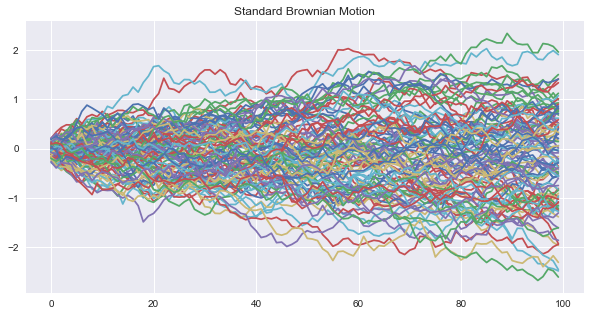

In [144]:
plt.figure(figsize=(10,5))
plt.title('Standard Brownian Motion')
for i in bm_plot:
    plt.plot(i)

### Brownian bridge

In [82]:
bb_cov = np.reshape(np.array([i*(1-j) for j in time_index for i in time_index]), (101,101))

In [83]:
bb_cov

array([[1.000e+00, 1.000e-02, 2.000e-02, ..., 9.800e-01, 9.900e-01,
        1.000e+00],
       [0.000e+00, 1.000e+00, 1.980e-02, ..., 9.702e-01, 9.801e-01,
        9.900e-01],
       [0.000e+00, 9.800e-03, 1.000e+00, ..., 9.604e-01, 9.702e-01,
        9.800e-01],
       ...,
       [0.000e+00, 2.000e-04, 4.000e-04, ..., 1.000e+00, 1.980e-02,
        2.000e-02],
       [0.000e+00, 1.000e-04, 2.000e-04, ..., 9.800e-03, 1.000e+00,
        1.000e-02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [84]:
bb_plot = np.array([np.dot(np.linalg.cholesky(bb_cov), np.random.normal(loc=0, scale=1, size=101)) for _ in range(101)])

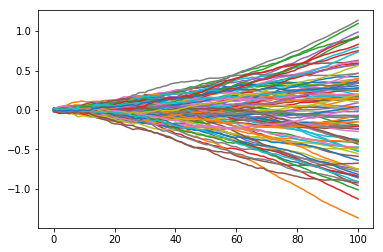

In [85]:
for i in range(101):
    plt.plot(np.cumsum(bm_plot[i]))

### Ornstein-Uhlenbeck process

In [94]:
ou_cov = np.reshape(np.array([ornstein_uhlenbeck(i,j,type=1) for j in time_index for i in time_index]), (100,100))

In [147]:
ou_cov

array([[1.00000000e+00, 1.01006700e-02, 2.04053871e-02, ...,
        3.04966353e+00, 3.12137149e+00, 3.19452805e+00],
       [0.00000000e+00, 1.00000000e+00, 2.00013334e-02, ...,
        2.98927615e+00, 3.05956420e+00, 3.13127216e+00],
       [0.00000000e+00, 9.70461708e-03, 1.00000000e+00, ...,
        2.93008452e+00, 2.99898077e+00, 3.06926881e+00],
       ...,
       [0.00000000e+00, 1.42276443e-03, 2.87427060e-03, ...,
        1.00000000e+00, 4.39671460e-01, 4.49976177e-01],
       [0.00000000e+00, 1.39459181e-03, 2.81735623e-03, ...,
        4.21064718e-01, 1.00000000e+00, 4.41066051e-01],
       [0.00000000e+00, 1.36697704e-03, 2.76156884e-03, ...,
        4.12727078e-01, 4.22431695e-01, 1.00000000e+00]])

In [95]:
ou_plot = np.array([np.dot(np.linalg.cholesky(ou_cov), np.random.normal(loc=0, scale=1, size=100)) for _ in range(100)])

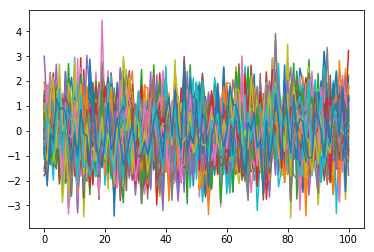

In [96]:
plt.plot(ou_plot)
plt.show()

### Ornstein-Uhlenbeck process (variance 1/2)

In [97]:
ouv_cov = np.reshape(np.array([ornstein_uhlenbeck(i,j,0) for j in time_index for i in time_index]), (100,100))

In [148]:
ouv_cov

array([[1.        , 0.51010067, 0.52040539, ..., 3.54966353, 3.62137149,
        3.69452805],
       [0.49009934, 1.        , 0.51010067, ..., 3.47937549, 3.54966353,
        3.62137149],
       [0.48039472, 0.49009934, 1.        , ..., 3.41047923, 3.47937549,
        3.54966353],
       ...,
       [0.07042921, 0.07185197, 0.07330348, ..., 1.        , 0.51010067,
        0.52040539],
       [0.06903462, 0.07042921, 0.07185197, ..., 0.49009934, 1.        ,
        0.51010067],
       [0.06766764, 0.06903462, 0.07042921, ..., 0.48039472, 0.49009934,
        1.        ]])

In [98]:
ouv_plot = np.array([np.dot(np.linalg.cholesky(ouv_cov), np.random.normal(loc=0, scale=1, size=100)) for _ in range(100)])

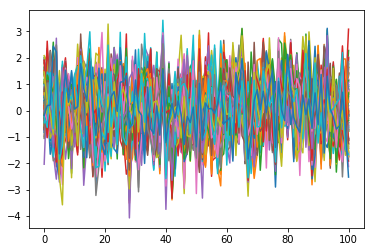

In [99]:
plt.plot(ouv_plot)
plt.show()

#### (b) Consider the construction of Brownian bridge in Exercise 5. Use the 100 paths of Brownian motion given in the last question to plot 100 paths of Brownian bridge this way. Compare this to the 100 paths of Brownian bridge in the last question on the same random sample. What do you notice?